<a href="https://colab.research.google.com/github/malick08012/Time-Series-Analysis-/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Required Libraries

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")


#Upload Data set

In [3]:
from google.colab import files
uploaded = files.upload()  # Opens a file picker

Saving 2) Stock Prices Data Set.csv to 2) Stock Prices Data Set.csv


#Load Data Set

In [8]:
df = pd.read_csv('/content/2) Stock Prices Data Set.csv')  # change path if needed in Colab

In [9]:
display(df.head(10))

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
5,ABT,2014-01-02,38.0900,38.4000,38.0000,38.2300,4967472
6,ACN,2014-01-02,81.5000,81.9200,81.0900,81.1300,2405384
7,ADBE,2014-01-02,59.0600,59.5300,58.9400,59.2900,2746370
8,ADI,2014-01-02,49.5200,49.7500,49.0400,49.2800,2799092
9,ADM,2014-01-02,43.2200,43.2900,42.7900,42.9900,2753765


#Prepare Data

In [10]:
# Filter Apple stock
df = df[df['symbol'] == 'AAPL']

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort by date
df = df.sort_values('date')

# Set date as index
df.set_index('date', inplace=True)

# Select 'close' price only for analysis
ts = df['close']

# Display the first few rows
ts.head()

,close
date,
2014-01-02,79.0185
2014-01-03,77.2828
2014-01-06,77.7042
2014-01-07,77.1481
2014-01-08,77.6371


#Plot & Decompose Time Series

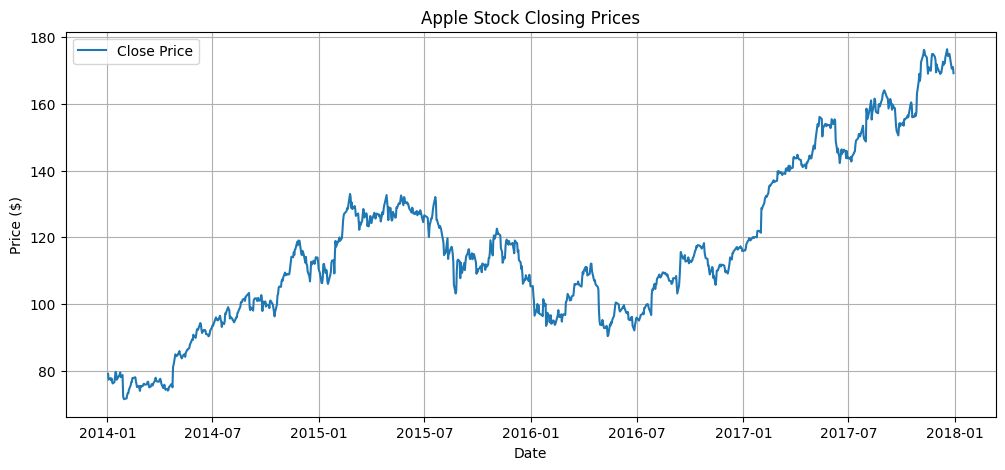

In [12]:
# Plot full time series
plt.figure(figsize=(12, 5))
plt.plot(ts, label='Close Price')
plt.title('Apple Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()




#Decompose the Time series

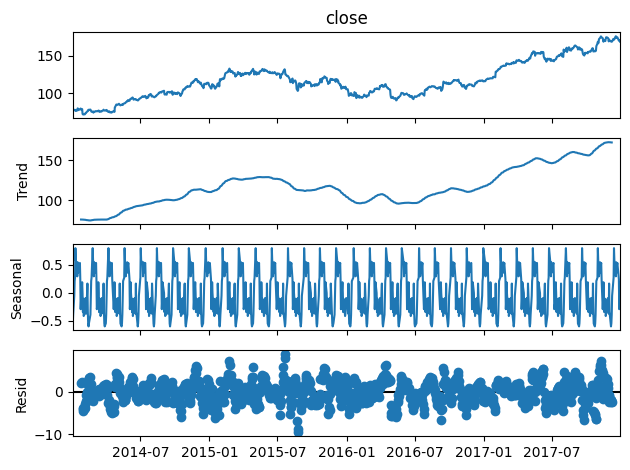

In [13]:
# Decompose the series (monthly frequency inferred)
decompose_result = seasonal_decompose(ts, model='additive', period=30)
decompose_result.plot()
plt.tight_layout()
plt.show()

#Moving Average

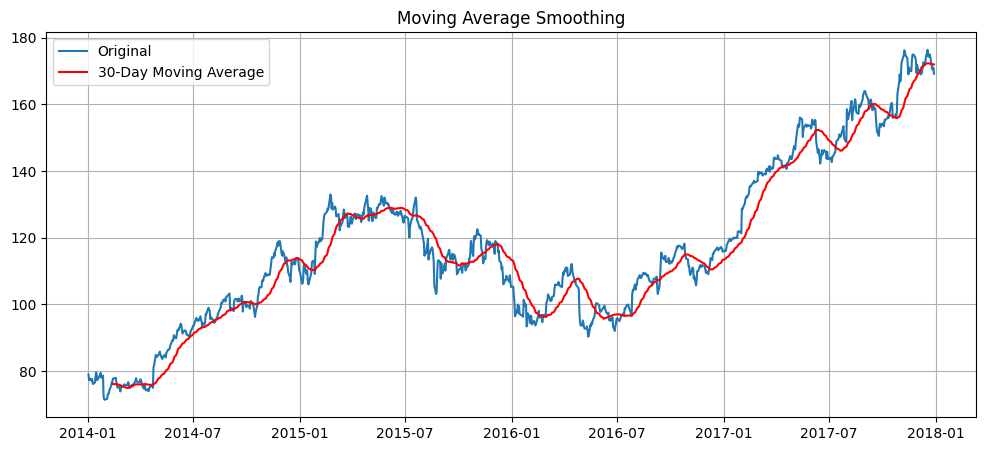

In [14]:
# Moving Average
ts_ma = ts.rolling(window=30).mean()

# Plot moving average
plt.figure(figsize=(12, 5))
plt.plot(ts, label='Original')
plt.plot(ts_ma, label='30-Day Moving Average', color='red')
plt.title('Moving Average Smoothing')
plt.legend()
plt.grid(True)
plt.show()


#Exponential Smoothing

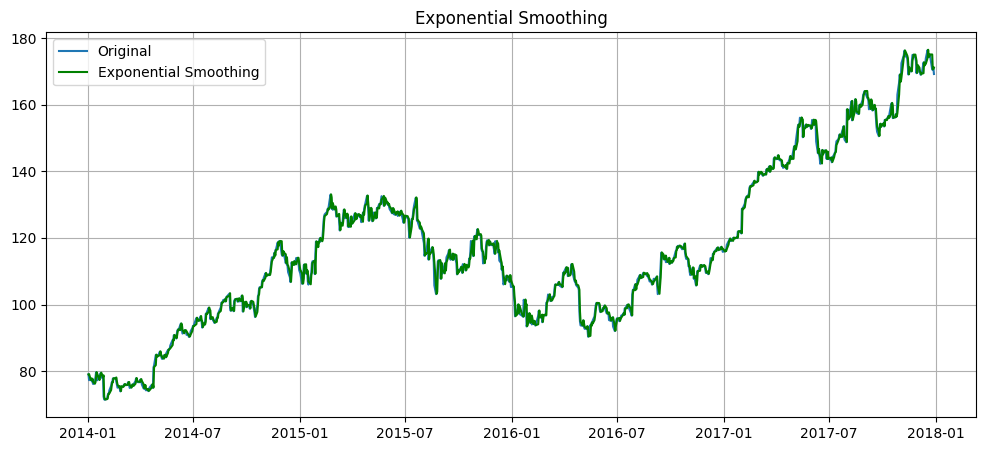

In [15]:
# Exponential Smoothing
model_es = ExponentialSmoothing(ts, trend='add', seasonal=None)
fit_es = model_es.fit()
ts_es = fit_es.fittedvalues

# Plot Exponential Smoothing
plt.figure(figsize=(12, 5))
plt.plot(ts, label='Original')
plt.plot(ts_es, label='Exponential Smoothing', color='green')
plt.title('Exponential Smoothing')
plt.legend()
plt.grid(True)
plt.show()

#ARIMA Model for Forecasting

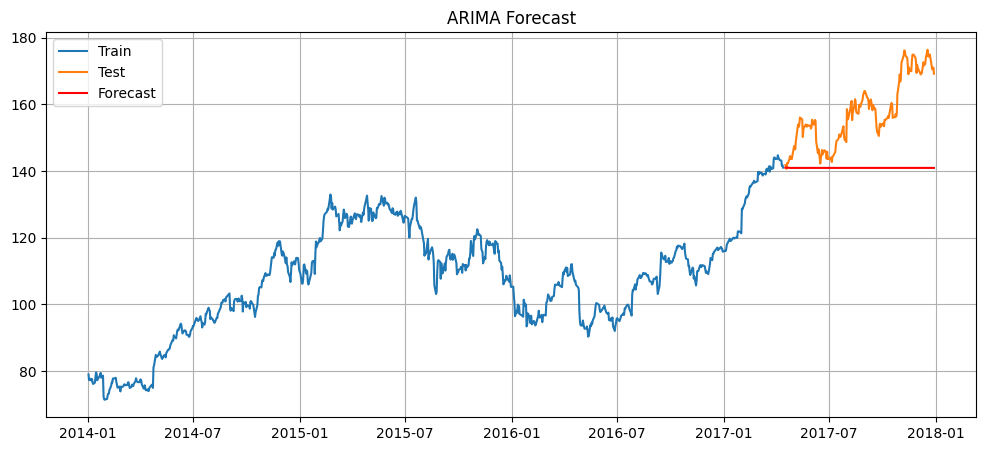

In [16]:
# Split into train and test (last 180 days as test)
train = ts[:-180]
test = ts[-180:]

# Fit ARIMA model (you can adjust order)
model_arima = ARIMA(train, order=(5,1,2))
fit_arima = model_arima.fit()

# Forecast
forecast = fit_arima.forecast(steps=len(test))

# Plot Forecast
plt.figure(figsize=(12, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()


#Evaluate Forecast (RMSE)

In [17]:
# Calculate RMSE
rmse = sqrt(mean_squared_error(test, forecast))
print(f'ARIMA Forecast RMSE: {rmse:.2f}')


ARIMA Forecast RMSE: 19.18


#Final Forecast on Full Series

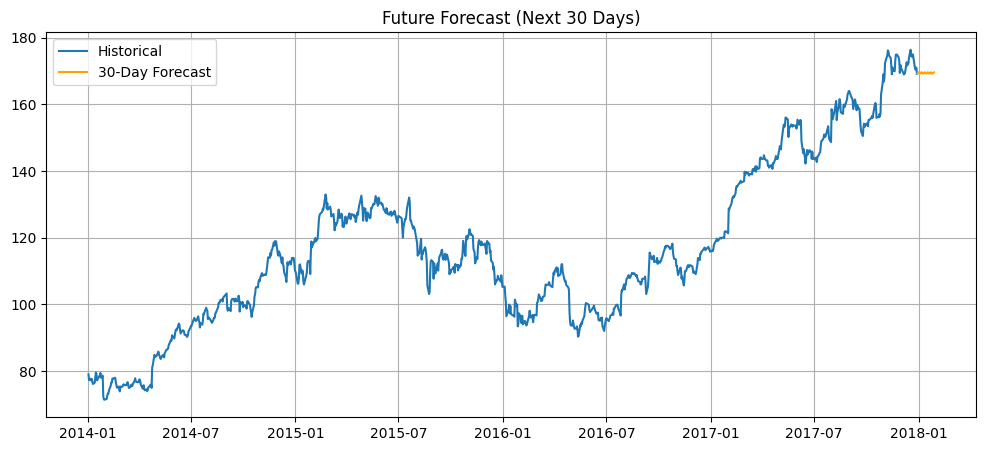

In [18]:
# Retrain on full data
model_full = ARIMA(ts, order=(5,1,2))
fit_full = model_full.fit()

# Forecast next 30 days
future_forecast = fit_full.forecast(steps=30)

# Plot future forecast
plt.figure(figsize=(12, 5))
plt.plot(ts, label='Historical')
plt.plot(pd.date_range(start=ts.index[-1], periods=31, freq='D')[1:], future_forecast,
         label='30-Day Forecast', color='orange')
plt.title('Future Forecast (Next 30 Days)')
plt.legend()
plt.grid(True)
plt.show()


#Visualize the forecast

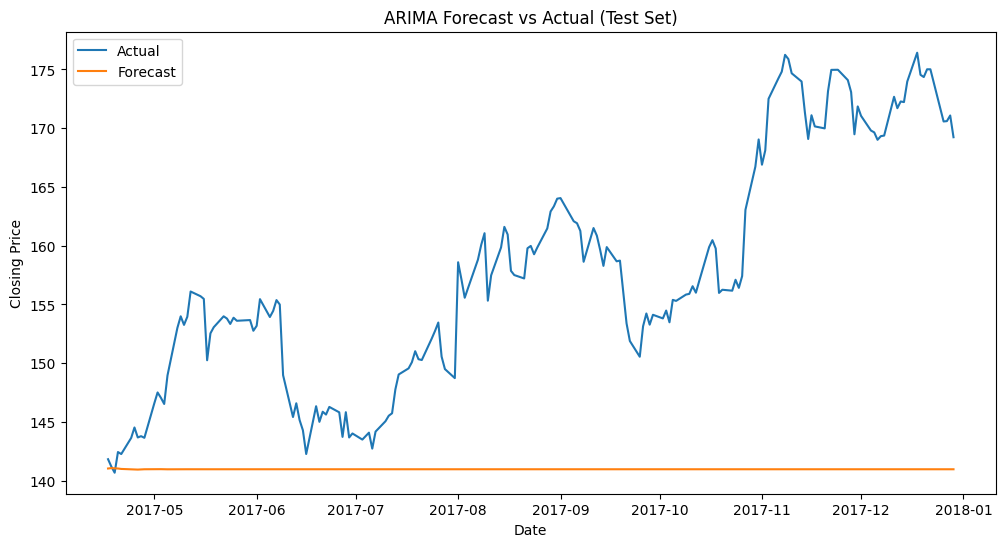

In [19]:
plt.figure(figsize=(12,6))
plt.plot(test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.title('ARIMA Forecast vs Actual (Test Set)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()
